In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('twitter_training.csv')

# Display the first few rows of the dataset
print(data.head())


   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [2]:
print(data.columns)


Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [3]:
data.columns = ['ID', 'Topic', 'Sentiment', 'Text']


In [4]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already installed
nltk.download('stopwords')

# Create a list of stopwords
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    # Convert non-string values to strings
    if isinstance(text, str):
        # Convert text to lowercase
        text = text.lower()

        # Remove special characters and numbers
        text = re.sub(r'[^a-z\s]', '', text)

        # Remove stopwords
        text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text

# Apply the cleaning function to the 'Text' column
data['cleaned_text'] = data['Text'].apply(clean_text)

# Display cleaned data
print(data[['Text', 'cleaned_text']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sachi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


                                                Text  \
0  I am coming to the borders and I will kill you...   
1  im getting on borderlands and i will kill you ...   
2  im coming on borderlands and i will murder you...   
3  im getting on borderlands 2 and i will murder ...   
4  im getting into borderlands and i can murder y...   

                    cleaned_text  
0            coming borders kill  
1    im getting borderlands kill  
2   im coming borderlands murder  
3  im getting borderlands murder  
4  im getting borderlands murder  


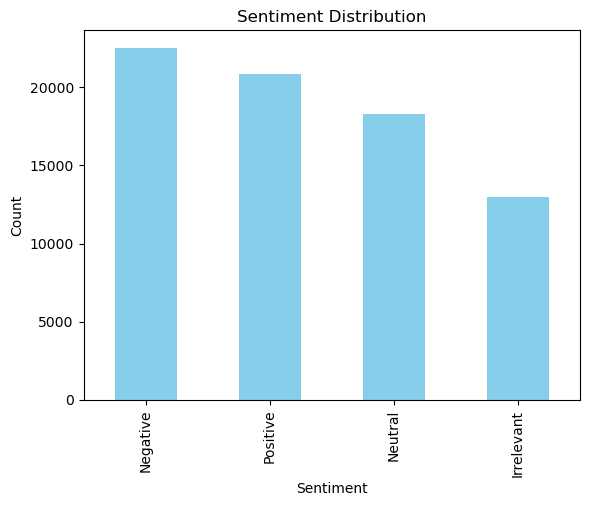

In [5]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
sentiment_counts = data['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
